<h1>Part 1: Sales and Profitability Analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
List_of_Orders = pd.read_csv("DATASET/List_of_Orders_55FFC79CF8.csv")
Order_Details = pd.read_csv("DATASET/Order_Details_19795F61CF.csv")

In [10]:
List_of_Orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [11]:
Order_Details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [12]:
List_of_Orders.info()
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


<p>There is 500 non-null values in all the column of List_of_Orders table and all the dtypes of columns are also right, therefore no need of data cleaning , and the given dataset is clean dataset</p>
<p>There is 1500 non-null values in all the column of Order_Details table and all the dtypes of columns are also right, therefore no need of data cleaning , and the given dataset is clean dataset</p>

<h3>(a) Merge the List of Orders and Order Details datasets on the basis of Order ID.
Calculate the total sales (Amount) for each category across all orders.</h3>

In [13]:
# Merge the datasets on basis of 'Order ID'
merged_df = pd.merge(List_of_Orders, Order_Details, on='Order ID', how='inner')

In [15]:
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   CustomerName  1500 non-null   object 
 3   State         1500 non-null   object 
 4   City          1500 non-null   object 
 5   Amount        1500 non-null   float64
 6   Profit        1500 non-null   float64
 7   Quantity      1500 non-null   int64  
 8   Category      1500 non-null   object 
 9   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 117.3+ KB


In [34]:
total_sales_by_category = merged_df.groupby('Category')['Amount'].sum().reset_index()

In [42]:
total_sales_by_category

,Category,Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


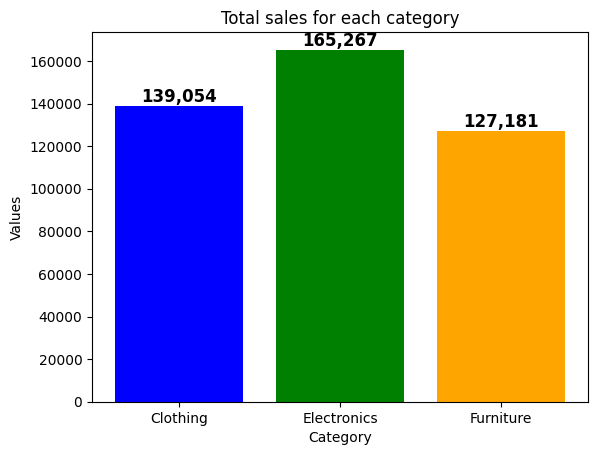

In [44]:
plt.bar(total_sales_by_category["Category"], total_sales_by_category["Amount"], color=['blue', 'green', 'orange'])
plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Total sales for each category")

# Add exact values on top of bars
for i, v in enumerate(total_sales_by_category["Amount"]):
    plt.text(i, v + 2000, f"{v:,.0f}", ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

<p>Conclusion: The total sales for category clothing is 1,39,054 , Electronics is 1,65,267 and furniture is 1,27,181 , therefore Electronics has a highest sales across all the orders, which shows electroics has better market demand</p>

<h3>(b) For each category, calculate the average profit per order and total profit margin
(profit as a percentage of Amount).</h3>

In [67]:
category_stats = merged_df.groupby('Category').agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order ID', 'nunique')  #nunique counts unique orders per category
).reset_index()

In [68]:
category_stats

,Category,Total_Sales,Total_Profit,Order_Count
0,Clothing,139054.0,11163.0,393
1,Electronics,165267.0,10494.0,204
2,Furniture,127181.0,2298.0,186


In [72]:
# calculateing Average Profit per Order
category_stats['Avg_Profit_Per_Order'] = category_stats['Total_Profit'] / category_stats['Order_Count']

# calculateing Total Profit Margin(%)
category_stats['Profit_Margin(%)'] = (category_stats['Total_Profit'] / category_stats['Total_Sales']) * 100


In [73]:
category_stats

,Category,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order,Profit_Margin(%)
0,Clothing,139054.0,11163.0,393,28.404580,8.027817
1,Electronics,165267.0,10494.0,204,51.441176,6.349725
2,Furniture,127181.0,2298.0,186,12.354839,1.806874


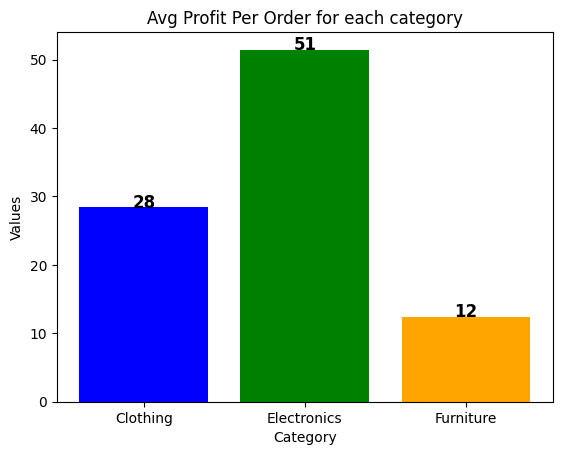

In [74]:
plt.bar(category_stats["Category"], category_stats["Avg_Profit_Per_Order"], color=['blue', 'green', 'orange'])
plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Avg Profit Per Order for each category")

for i, v in enumerate(category_stats["Avg_Profit_Per_Order"]):
    plt.text(i, v, f"{v:,.0f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

<p>Conclusion: The avg profit per order for clothing is 28, electronics is 51 and furniture is 12, it shows that electronics has highest sales as well as electronics has highest avg profit per order</p>

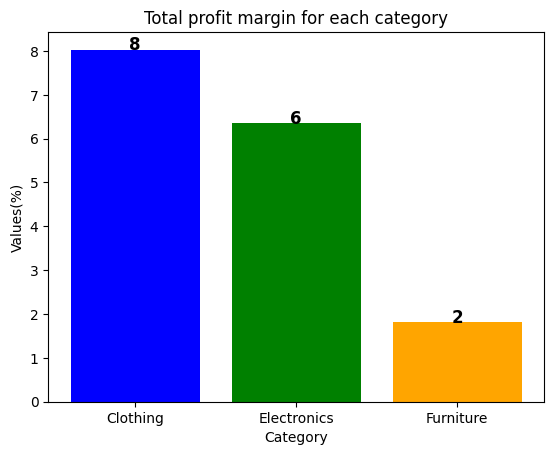

In [76]:
plt.bar(category_stats["Category"], category_stats["Profit_Margin(%)"], color=['blue', 'green', 'orange'])
plt.xlabel("Category")
plt.ylabel("Values(%)")
plt.title("Total profit margin for each category")

for i, v in enumerate(category_stats["Profit_Margin(%)"]):
    plt.text(i, v, f"{v:,.0f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

<P>Conclusion: The total profit margin for clothing is 8%, electronics is 6% and furniture is %2, it shows that electronics has highest sales as well as highest avg profit per order but the highest profit is coming for clothing</P>

<h3>(c) Identify the top-performing and underperforming categories based on these
metrics. Also, suggest reasons for their performance differences.</h3>

In [86]:
top_performing = category_stats.sort_values(by='Profit_Margin(%)', ascending=False).head(1) 
under_performing = category_stats.sort_values(by='Profit_Margin(%)').head(1)

top_performing


,Category,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order,Profit_Margin(%)
0,Clothing,139054.0,11163.0,393,28.40458,8.027817


In [87]:
under_performing

,Category,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order,Profit_Margin(%)
2,Furniture,127181.0,2298.0,186,12.354839,1.806874


<h4>Possible Reasons for Top Performance Category(Clothing)</h4>
<ul>
    <li>Clothing may have premimum prodcuts that leads to higher prices.</li>
    <li>Clothings have less logistic rates and modrate return rate, which gives high profit margin.</li>
    <li>Higher customer demand because it has varitey of styles and different types fabrics that lead to strong performance</li>
</ul>

<h4>Possible Reasons for Under Performance Category(Furniture)</h4>
<ul>
    <li>In furniture damaged inventory may leads to loss</li>
    <li>Seasonal discounts like daasera, diwali reduces profit margin.</li>
    <li>Logistics cost is high for bulky furintures which gives less profit margins.</li>
</ul>